In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# 设置中文字体
plt.rcParams['font.sans-serif']=['SimHei']
#显示负号
matplotlib.rcParams['axes.unicode_minus']=False

# 1、函数语法：

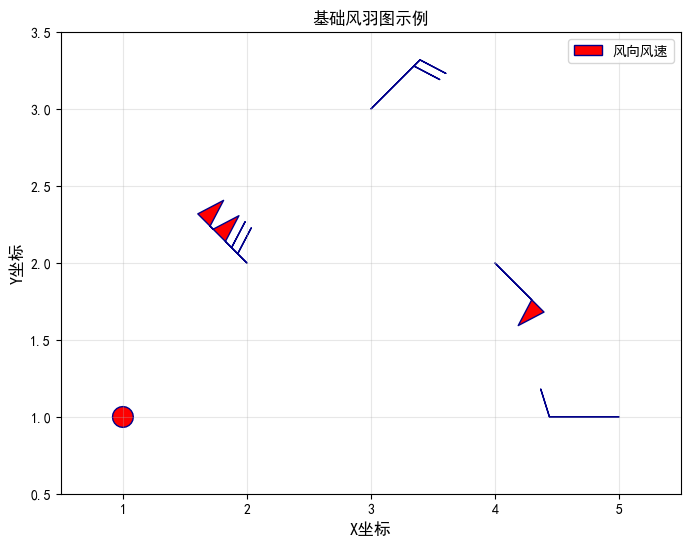

In [3]:
# 观测点的x、y坐标（假设为平面直角坐标）
x = np.array([1, 2, 3, 4, 5])
y = np.array([1, 2, 3, 2, 1])

# 原始风向（单位：度，正北为0°，顺时针为正）和风速（单位：m/s）
wind_direction = np.array([45, 135, 225, 315, 90])  # 风向：分别对应东北、东南、西南、西北、东风
wind_speed = np.array([0, 120, 18, 50, 8])          # 风速

# 将风向风速转换为u、v分量
u = wind_speed * np.sin(wind_direction * np.pi / 180)
v = wind_speed * np.cos(wind_direction * np.pi / 180)

fig, ax = plt.subplots(figsize=(8, 6)) 

# 绘制风向标图
barbs = ax.barbs(
    x, y, u, v,            # 必要参数：x/y坐标，u/v风速分量
    length=10,             # 风标主体长度（单位：点），值越大风标越大
    barbcolor="darkblue",  # 风羽和杆的颜色（非旗帜部分）
    flagcolor="red",       # 强风旗帜的颜色
    linewidths=1.2,        # 风标线条的粗细
    fill_empty=True,       # 当风速为0时，是否填充表示静风的圆形
    label="风向风速"       # 图例标签
)

ax.set_xlabel("X坐标", fontsize=12)  # x轴标签
ax.set_ylabel("Y坐标", fontsize=12)  # y轴标签
ax.set_title("基础风羽图示例")  # 标题
ax.grid(True, alpha=0.3)  # 添加网格线
ax.legend(fontsize=10)    # 显示图例

# 调整坐标轴范围
ax.set_xlim(0.5, 5.5)
ax.set_ylim(0.5, 3.5)
plt.show()

# 2、使用示例：

### 示例 1：定制化风标样式

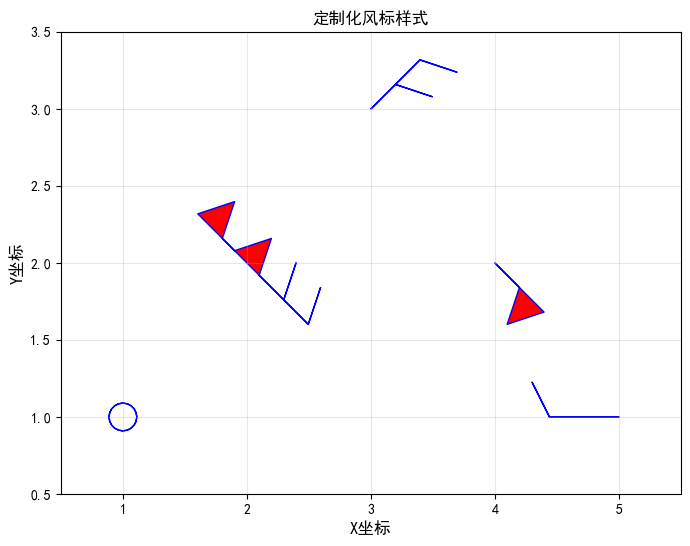

In [4]:
# 定制化风羽图
fig, ax = plt.subplots(figsize=(8, 6))

# 定义自定义尺寸参数字典，用于精细控制风羽图的外观
# 这些参数将影响风羽各部分的比例和布局
barb_sizes = {
    'spacing': 0.5,    # 标记之间的间距
    'height': 0.5,      # 标记相对于杆的高度
    'width': 0.5,       # 标记宽度（相对于间距）
    'emptybarb': 0.2,
}

# 绘制定制化风羽图
plt.barbs(x, y, u, v, 
          length=10, 
          barbcolor='blue',
          flagcolor='red',
          sizes=barb_sizes   # 应用前面定义的自定义尺寸参数
         )

ax.set_xlabel("X坐标", fontsize=12) 
ax.set_ylabel("Y坐标", fontsize=12) 
ax.set_title("定制化风标样式") 
ax.grid(True, alpha=0.3) 
ax.set_xlim(0.5, 5.5)
ax.set_ylim(0.5, 3.5)
plt.show()

### 示例 2：颜色映射

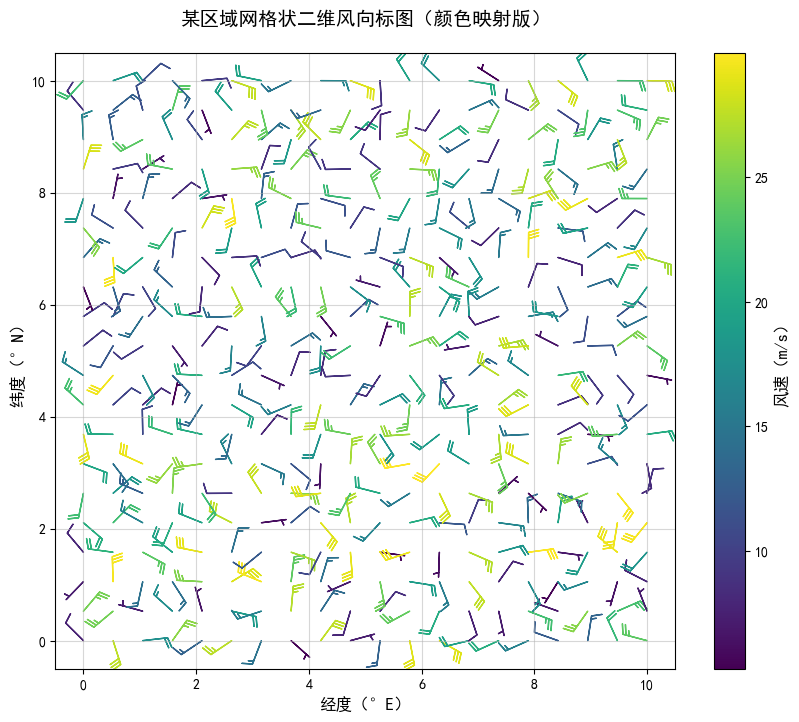

In [5]:
# 创建20×20的网格坐标（x、y范围均为0-10）
x = np.linspace(0, 10, 20)
y = np.linspace(0, 10, 20)
X, Y = np.meshgrid(x, y)  # 生成网格矩阵

# 模拟随空间变化的风向和风速
np.random.seed(42)
wind_direction = 360 * np.random.rand(*X.shape)  # 风向：0-360°随机分布
wind_speed = 5 + 25 * np.random.rand(*X.shape)   # 风速：5-30m/s随机分布

# 转换为u、v分量
u = wind_speed * np.sin(wind_direction * np.pi / 180)
v = wind_speed * np.cos(wind_direction * np.pi / 180)

fig, ax = plt.subplots(figsize=(10, 8))

# 关键：用风速作为颜色映射的依据，让不同风速的风向标显示不同颜色
barbs = ax.barbs(
    X, Y, u, v,
    wind_speed,            # 颜色映射的数据源
    length=6, 
    cmap="viridis",        # 配色方案
    barbcolor="black", 
    linewidths=0.8
)

# 添加颜色条
cbar = plt.colorbar(barbs, ax=ax)
cbar.set_label("风速（m/s）", fontsize=12)  # 颜色条标签

ax.set_xlabel("经度（°E）", fontsize=12)
ax.set_ylabel("纬度（°N）", fontsize=12)
ax.set_title("某区域网格状二维风向标图（颜色映射版）", fontsize=14, fontweight="bold", pad=20)
ax.grid(True, alpha=0.5)
plt.show()